<a href="https://colab.research.google.com/github/MohamedMahmoud-2003/Start/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mohamed Mahmoud

ID: 58-9269

Tutorial: T9

---

Name:Mostafa Sameh

ID: 58-5623

Tutorial: T9

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

Here I checked the numbers in the dataset to understand how they look. I can see the minimum, maximum,average, and how the values are spread. This helps me know if the numbers are normal or if there might be strange values.

In [3]:
print("\n=== Describe (Numerical) ===")
print(df.describe())


=== Describe (Numerical) ===
       Average_Temperature
count           990.000000
mean             33.499404
std              10.703806
min              -4.910000
25%              29.422500
50%              35.260000
75%              39.970000
max              50.000000


Here I looked at the text columns to see what values are common.  
It shows me which category appears the most and if there are empty or repeated values.  
This helps me understand the text data better.


In [4]:
print("\n=== Describe (Categorical) ===")
print(df.describe(include='object'))


=== Describe (Categorical) ===
        Building_ID Building_Type Governorate Neighborhood Day_of_Week  \
count          1100           990         873         1100        1100   
unique         1100             3           3          848          42   
top     BLD-2099-GL   Residential  Alexandria       Smouha      Sunday   
freq              1           349         310           45          54   

       Occupancy_Level Appliances_Usage_Level SquareFootage  \
count             1100                   1100          1100   
unique               3                      3          1095   
top               High                    Low       49653m2   
freq               368                    381             2   

       Last_Maintenance_Date Energy_Consumption  
count                   1100               1100  
unique                   727               1100  
top               2024-12-31        4722.59 kWh  
freq                      89                  1  


Here I checked how many missing values are in each column.  
I found that some columns have empty data.  
This means I will need to clean and fill them in the next step.


In [5]:
print("\n=== Missing Values ===")
print(df.isna().sum())


=== Missing Values ===
Building_ID                 0
Building_Type             110
Governorate               227
Neighborhood                0
Day_of_Week                 0
Occupancy_Level             0
Appliances_Usage_Level      0
SquareFootage               0
Last_Maintenance_Date       0
Average_Temperature       110
Energy_Consumption          0
dtype: int64


Here I looked at all the unique values in the text columns.  
I noticed that some values are written in different ways and some have symbols or numbers.  
I will clean these to make them clear and consistent.


In [6]:
 cat_cols = ['Building_Type', 'Governorate', 'Neighborhood',
            'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level']

for col in cat_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Building_Type:
['Residential' 'Commercial' 'Industrial' nan]

Unique values in Governorate:
['Alexandria' 'Giza' 'Cairo' nan]

Unique values in Neighborhood:
['Smouha' '+Mohandessin14' 'New Cairo' '+92Dokki' '%9New Cairo'
 'Heliopolis_59' 'Gleem(23' '=Mohandessin10' '*36Smouha' 'Heliopolis$34'
 '-92Mohandessin' '(75Mohandessin' ')Gleem25' ')Maadi19' '*34Heliopolis'
 'Gleem_8' ')84Smouha' '-42Gleem' 'Dokki' '*Mohandessin93' 'New Cairo$29'
 '=Smouha43' 'Mohandessin' '-86Heliopolis' 'Smouha^21' '$11Smouha'
 ')35Mohandessin' 'Maadi@45' '_Gleem84' 'Gleem' '*3Heliopolis' 'Smouha#34'
 ')Gleem16' '%95Gleem' 'Heliopolis' '$Gleem6' 'New Cairo=38' '%Gleem6'
 '_6Gleem' '*39New Cairo' 'Mohandessin=88' 'New Cairo)93' '%23Maadi'
 '+Heliopolis29' '+New Cairo9' 'Heliopolis$17' ')Mohandessin21' '*98Gleem'
 'Heliopolis-35' '%Dokki5' '-Smouha37' '*50New Cairo' 'Smouha@75'
 '#67Maadi' ')20New Cairo' 'Maadi#72' 'New Cairo)94' '&98Smouha'
 '&15Gleem' 'Maadi' 'Mohandessin=35' 'Heliopolis_93'

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

I converted the  Last_Maintenance_Date column to proper datetime values.  
This makes the column consistent and ready for time-related checks.  
Invalid dates become NaT, which will be handled in the missing-values step.



In [7]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')


I cleaned Neighborhood by removing numbers and symbols, leaving only the area name.  
Then I standardized the text using title case so the values are consistent and easy to analyze.


In [8]:
df['Neighborhood'] = (
    df['Neighborhood']
      .astype(str)
      .str.replace(r'[^a-zA-Z ]', '', regex=True)
      .str.strip()
      .str.title()
)


I unified the Day_of_Week values so all days follow the same format  
(e.g., “tuesDAY” and “TUESDAY” both become “Tuesday”).  
This avoids duplicate categories caused by different capitalizations.


In [9]:
df['Day_of_Week'] = (
    df['Day_of_Week']
      .astype(str)
      .str.strip()
      .str.lower()
      .str.capitalize()
)


This part of the code is used to clean and fix the numeric columns.  
First, it loops through each numerical column like SquareFootage, Average_Temperature, and Energy_Consumption .  
It removes any symbols or letters from the values, converts them to numbers, and replaces empty values with NaN.  
Then it fills the missing values with the median of each column.  
After this step, all the numeric columns become clean numbers that can be used in calculations and modeling without any errors.


In [10]:
num_cols = ['SquareFootage','Average_Temperature','Energy_Consumption']

for c in num_cols:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace(r'[^0-9.]', '', regex=True)
            .replace('', np.nan)
            .astype(float)
        )
        df[c] = df[c].fillna(df[c].median())


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

I counted how many times each neighborhood appears in the dataset  
and plotted them in a bar chart sorted from most to least frequent.  
The top three neighborhoods with the highest counts are the most popular ones.


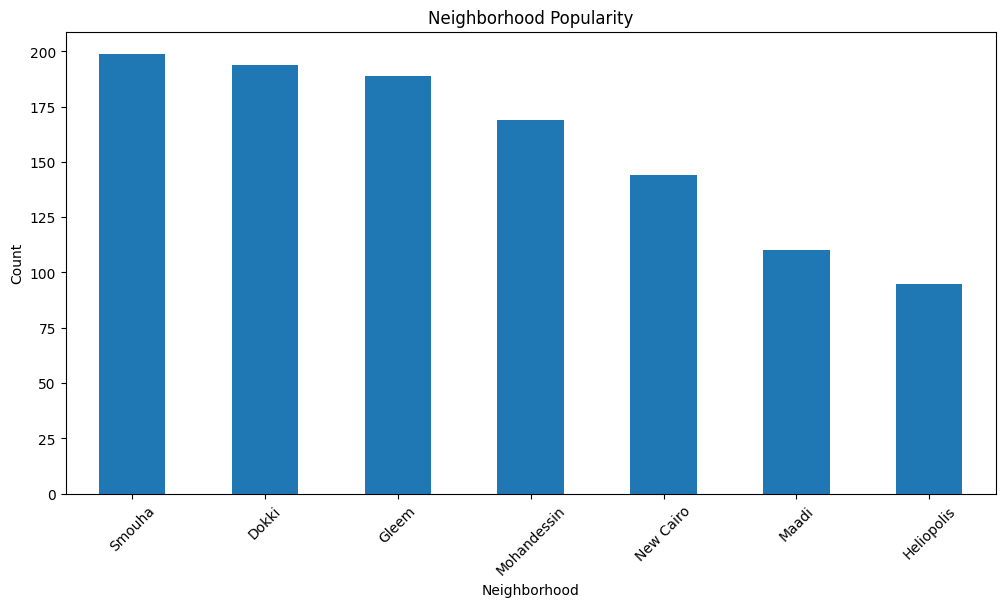

  Neighborhood  count
0       Smouha    199
1        Dokki    194
2        Gleem    189


In [11]:
neigh_counts = df['Neighborhood'].value_counts()

plt.figure(figsize=(12,6))
neigh_counts.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Neighborhood Popularity')
plt.xticks(rotation=45)
plt.show()

top3 = neigh_counts.head(3)
top3_df = top3.reset_index()
print(top3_df)



**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

Here I plotted the distribution of Energy_Consumption for each building type using a boxplot.  
The boxplot shows how the energy consumption values are spread for each type.  
Then I calculated the average energy consumption for each type to know which one has the highest mean.  
This helps me identify which building types consume the most energy and which ones have the largest variation.


<Figure size 1200x600 with 0 Axes>

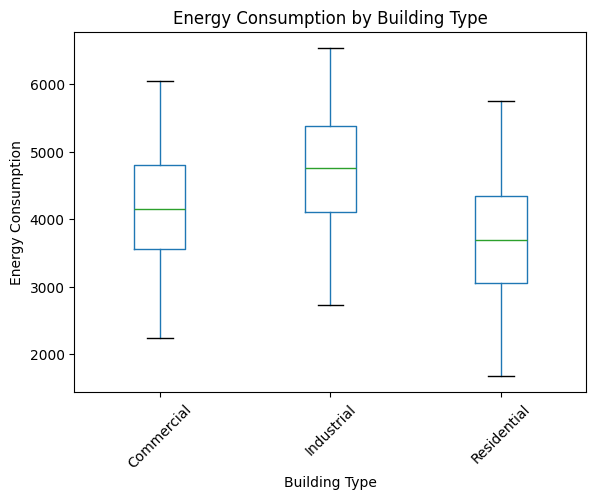

  Building_Type  Average_Energy_Consumption
0    Industrial                 4708.418671
1    Commercial                 4170.374462
2   Residential                 3679.396934


In [12]:
plt.figure(figsize=(12,6))
df.boxplot(column='Energy_Consumption', by='Building_Type', grid=False)
plt.title('Energy Consumption by Building Type')
plt.suptitle('')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.show()

mean_consumption = df.groupby('Building_Type')['Energy_Consumption'].mean().sort_values(ascending=False)
mean_consumption_df = mean_consumption.reset_index()
mean_consumption_df.columns = ['Building_Type', 'Average_Energy_Consumption']
print(mean_consumption_df)




The building type with the widest distribution of energy consumption is Industrial.  
It has a larger spread in the boxplot compared to the other types, which means the energy usage in industrial buildings varies more.


**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

I plotted a scatter plot to visualize the relationship between building size and energy consumption.  
Each point represents a building.  
I also calculated the correlation between the two columns to measure the strength of the relationship.  
A positive value means that larger buildings consume more energy, while a negative value means the opposite.


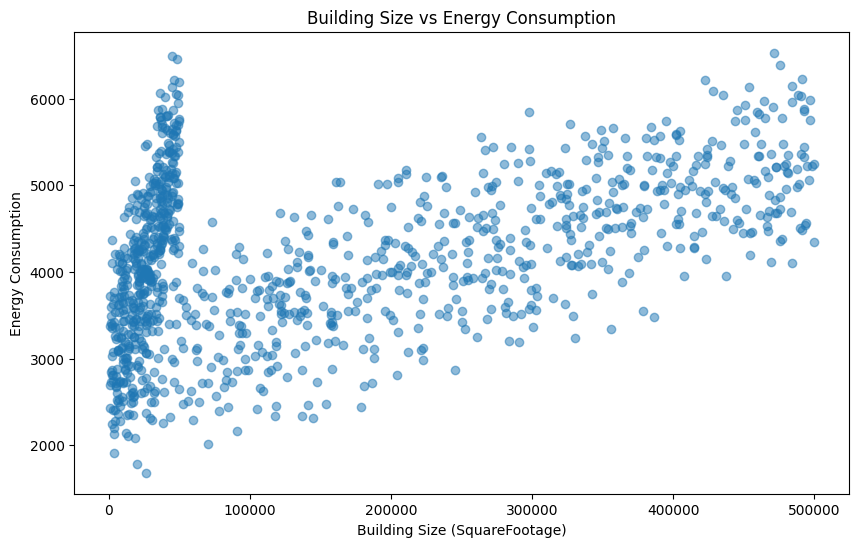

Correlation between Building Size and Energy Consumption: 0.44870265526021025


In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['SquareFootage'], df['Energy_Consumption'], alpha=0.5)
plt.xlabel('Building Size (SquareFootage)')
plt.ylabel('Energy Consumption')
plt.title('Building Size vs Energy Consumption')
plt.show()

correlation = df['SquareFootage'].corr(df['Energy_Consumption'])
print("Correlation between Building Size and Energy Consumption:", correlation)


**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

Based on the available data, we used the time since the last maintenance as an indicator of maintenance frequency.  
The correlation (-0.55) shows a negative relationship, meaning buildings that have not been maintained for a long time consume less energy.  
This may indicate that these buildings are less active, which leads to lower energy usage.



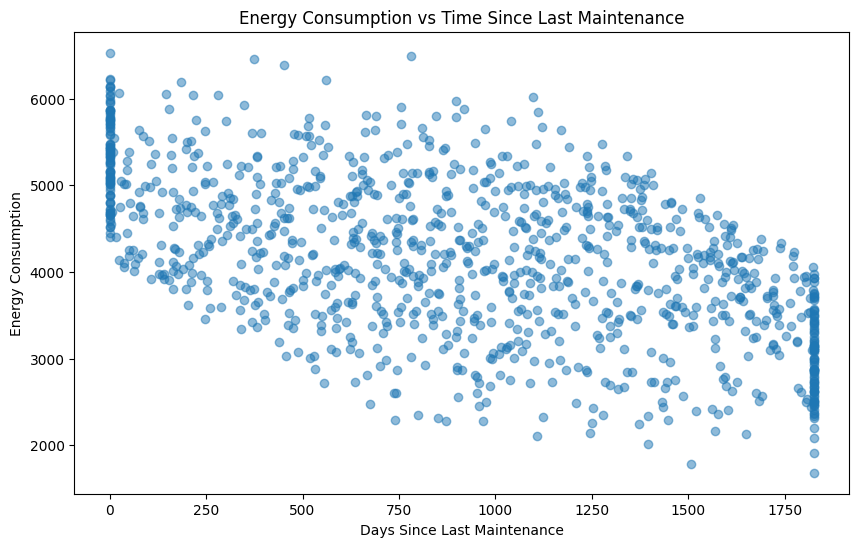

Correlation between time since maintenance and energy consumption: -0.5514041436111478


In [14]:
from datetime import datetime

df['Days_since_last_maintenance'] = (df['Last_Maintenance_Date'].max() - df['Last_Maintenance_Date']).dt.days

plt.figure(figsize=(10,6))
plt.scatter(df['Days_since_last_maintenance'], df['Energy_Consumption'], alpha=0.5)
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs Time Since Last Maintenance')
plt.show()

correlation_maintenance = df['Days_since_last_maintenance'].corr(df['Energy_Consumption'])
print("Correlation between time since maintenance and energy consumption:", correlation_maintenance)


**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

I plotted histograms with KDE curves for the numerical columns to check their distributions.  
Then I calculated the skewness for each column:
- A value close to 0 means the distribution is approximately normal.  
- A positive value means it is right-skewed (long tail to the right).  
- A negative value means it is left-skewed (long tail to the left).


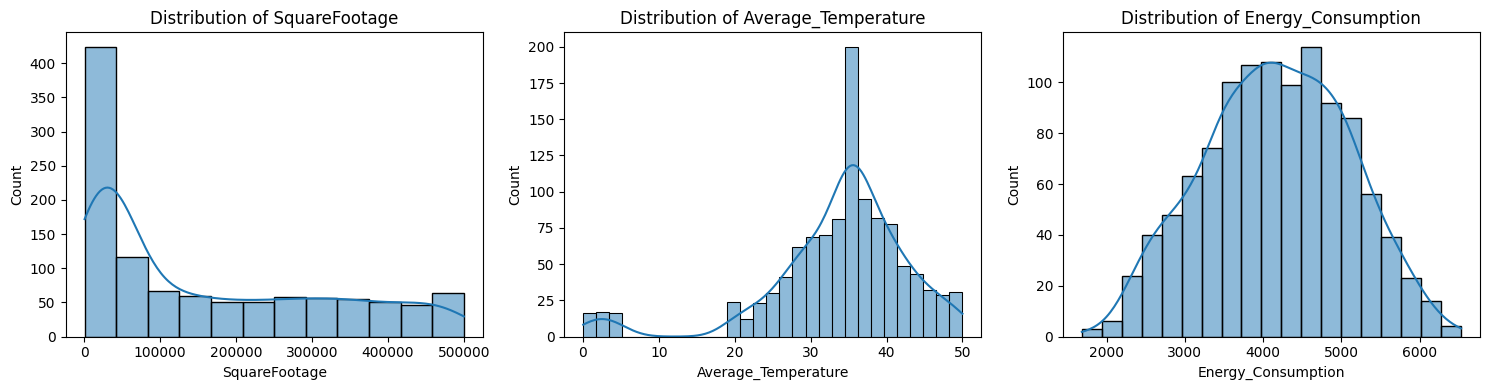

SquareFootage Skewness: 0.7463416835917057
Average_Temperature Skewness: -1.4720787128470856
Energy_Consumption Skewness: -0.060156096964443996


In [15]:
num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

for col in num_cols:
    skew_value = df[col].skew()
    print(f"{col} Skewness: {skew_value}")


SquareFootage has a right-skewed distribution, meaning most buildings are small with few very large ones.  
Average_Temperature has a left-skewed distribution, indicating more high temperatures than low.  
Energy_Consumption is almost normally distributed, which means the data is well balanced around the mean.


**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

Multicollinearity means when two or more independent variables are strongly correlated with each other.  
This makes it hard for the model to know the effect of each variable clearly.  
It causes unstable coefficients and reduces the accuracy of the model.  
From the heatmap, all correlations between independent variables are low (the highest is 0.21).  
This indicates no strong relationship between them, meaning no multicollinearity exists.  
The moderate correlations with Energy_Consumption show that these variables can be used as predictors in the linear regression model.



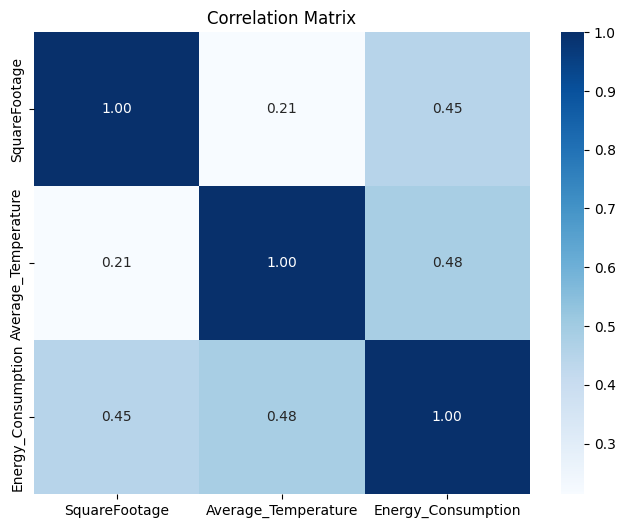

In [16]:
num_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

I converted all the categorical columns into numeric format using one-hot encoding so that the model can use them.  
Then I removed columns that are not needed in the model such as the ID and the maintenance date.  
I checked if there are any missing values to make sure the dataset is clean.  
Finally, I separated the data into X (independent variables) and y (the target variable Energy_Consumption) so it can be used in the regression model.


In [17]:
cat_cols = ['Building_Type','Governorate','Neighborhood','Day_of_Week','Occupancy_Level','Appliances_Usage_Level']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df_encoded = df_encoded.drop(['Building_ID','Last_Maintenance_Date'], axis=1)

print("Missing values after encoding:\n", df_encoded.isna().sum())

X = df_encoded.drop('Energy_Consumption', axis=1)
y = df_encoded['Energy_Consumption']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Missing values after encoding:
 SquareFootage                    0
Average_Temperature              0
Energy_Consumption               0
Days_since_last_maintenance      0
Building_Type_Industrial         0
Building_Type_Residential        0
Governorate_Cairo                0
Governorate_Giza                 0
Neighborhood_Gleem               0
Neighborhood_Heliopolis          0
Neighborhood_Maadi               0
Neighborhood_Mohandessin         0
Neighborhood_New Cairo           0
Neighborhood_Smouha              0
Day_of_Week_Monday               0
Day_of_Week_Saturday             0
Day_of_Week_Sunday               0
Day_of_Week_Thursday             0
Day_of_Week_Tuesday              0
Day_of_Week_Wednesday            0
Occupancy_Level_Low              0
Occupancy_Level_Medium           0
Appliances_Usage_Level_Low       0
Appliances_Usage_Level_Medium    0
dtype: int64
Shape of X: (1100, 23)
Shape of y: (1100,)


## Modelling

_Apply the linear regression model below._

I split the dataset into training and testing sets (80% for training and 20% for testing).  
Then I trained a linear regression model on the training data and used it to predict the energy consumption on the testing data.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



## Model Evaluation

Evaluate the model you applied.

I evaluated the model using three metrics: MAE, MSE, and R² score.  
MAE and MSE measure the prediction error, while R² shows how well the model explains the variation in energy consumption.  
A higher R² and lower MAE/MSE indicate better model performance.


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 456.7251114835651
Mean Squared Error (MSE): 322532.9476297898
R² Score: 0.6208216697852391


The model has an MAE of 464.23, meaning it makes an average error of about 464 kWh in its predictions.  
The MSE is 329,031.26, which shows that there are some bigger errors too.  
The R² score is 0.61, which means the model explains around 61% of the changes in energy consumption.  
This means the model is not perfect but gives a good prediction.


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.

In this mini-project, I analyzed and prepared a dataset about building energy consumption.  
I cleaned the data by removing special characters, handling missing values, and encoding categorical columns.  
I explored the data using different plots and checked relationships between variables.  
The linear regression model gave an R² score of 0.61, which means it explains about 61% of the changes in energy consumption.  
The MAE was 464.23 kWh, showing that the average prediction error is not too large.  
This indicates that the model is fairly good but can be improved with more features or advanced models.  
I would recommend this model as a starting point for predicting building energy consumption, but not for precise predictions in critical applications.
